In [2]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pip install scikit-learn==1.7.1

Note: you may need to restart the kernel to use updated packages.


In [5]:
df_balls = pd.read_csv('deliveries.csv')
df_matches = pd.read_csv('matches.csv')
df_balls.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [6]:
df_matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [7]:
df_matches.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

For null values we only focus on city, target_overs, and target_runs, as we need these columns for the final data.

In [8]:
df_matches[df_matches[['city']].isnull().any(axis=1)]['venue'].unique()

array([nan], dtype=object)

City Column value missing when venue is **'Sharjah Cricket Stadium**' OR **'Dubai International Cricket Stadium'**

In [9]:
def find_city(row):
    if row[['city']].isnull().any():
        if row['venue']=='Dubai International Cricket Stadium':
            row['city']='Dubai'
        else:
            row['city']='Sharjah'
    return row['city']

df_matches['city'] = df_matches.apply(find_city,axis=1)

In [10]:
#drop matches data where target runs and target overs is not avilable
df_matches.dropna(subset=['target_runs','target_overs'],inplace=True)

In [11]:
#merge matches and balls data by match id
df_matches.rename(columns={'id':'match_id'}, inplace=True)
df_merge = df_matches.merge(df_balls)
df_merge.head()

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [12]:
df_merge.keys()

Index(['match_id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker',
       'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket',
       'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')

In [13]:
df_merge.describe()

,match_id,result_margin,target_runs,target_overs,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,2.606110e+05,256796.000000,260611.000000,260611.000000,260611.000000,260611.000000,260611.000000,260611.000000,260611.000000,260611.000000,260611.000000
mean,9.069977e+05,17.279451,167.290406,19.846742,1.484105,9.198510,3.624486,1.265142,0.067783,1.332925,0.049626
std,3.680254e+05,21.600307,32.165944,1.224266,0.502665,5.683555,1.814899,1.639402,0.343152,1.626509,0.217171
min,3.359820e+05,1.000000,43.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483330e+05,6.000000,148.000000,20.000000,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.809670e+05,8.000000,167.000000,20.000000,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,1.254066e+06,20.000000,188.000000,20.000000,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.426312e+06,146.000000,288.000000,20.000000,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000


In [14]:
df_merge['team1'].value_counts() + df_merge['team2'].value_counts()

Chennai Super Kings            57109
Deccan Chargers                18073
Delhi Capitals                 22162
Delhi Daredevils               37448
Gujarat Lions                   7111
Gujarat Titans                 10795
Kings XI Punjab                45129
Kochi Tuskers Kerala            3196
Kolkata Knight Riders          59177
Lucknow Super Giants           10508
Mumbai Indians                 62942
Pune Warriors                  10837
Punjab Kings                   13552
Rajasthan Royals               52546
Rising Pune Supergiant          3828
Rising Pune Supergiants         3195
Royal Challengers Bangalore    56435
Royal Challengers Bengaluru     3619
Sunrisers Hyderabad            43560
Name: count, dtype: int64

convert,
1. Deccan Chargers => Sunrisers Hyderabad
2. Delhi Daredevils => Delhi Capitals
3. Gujarat Lions => Gujarat Titans
4. Kings XI Punjab => Punjab Kings
5. Royal Challengers Bangalore => Royal Challengers Bengaluru
6. Pune Warriors => Rising Pune Supergiants
7. Rising Pune Supergiant => Rising Pune Supergiants

remove,
1. Kochi Tuskers Kerala

In [15]:
df_merge.replace(['Deccan Chargers','Delhi Daredevils','Gujarat Lions','Kings XI Punjab','Royal Challengers Bangalore','Pune Warriors','Rising Pune Supergiant'],
    ['Sunrisers Hyderabad','Delhi Capitals','Gujarat Titans','Punjab Kings','Royal Challengers Bengaluru','Rising Pune Supergiants','Rising Pune Supergiants'],inplace=True)
df_merge = df_merge[df_merge['team1']!='Kochi Tuskers Kerala']
df_merge = df_merge[df_merge['team2']!='Kochi Tuskers Kerala']

In [16]:
list(set(np.concatenate((df_merge['team2'].unique(),df_merge['team2'].unique()))))

['Mumbai Indians',
 'Gujarat Titans',
 'Rajasthan Royals',
 'Delhi Capitals',
 'Rising Pune Supergiants',
 'Punjab Kings',
 'Chennai Super Kings',
 'Lucknow Super Giants',
 'Sunrisers Hyderabad',
 'Kolkata Knight Riders',
 'Royal Challengers Bengaluru']

In [17]:
# We have only included current playing teams
teams = ['Kolkata Knight Riders',
 'Sunrisers Hyderabad',
 'Punjab Kings',
 'Delhi Capitals',
 'Gujarat Titans',
 'Rajasthan Royals',
 'Lucknow Super Giants',
 'Chennai Super Kings',
 'Mumbai Indians',
 'Royal Challengers Bengaluru']

In [18]:
# We only include data where super over did not occur
df_merge = df_merge[df_merge['super_over']=='N']

In [19]:
# We only include data where the result is not based on the D/L method
df_merge = df_merge[df_merge['method']!='D/L']

In [20]:
df_merge['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', 'Dubai', 'Rajkot', 'Kanpur', 'Indore', 'Bengaluru',
       'Navi Mumbai', 'Lucknow', 'Guwahati', 'Mohali'], dtype=object)

In [21]:
# We have only included cities where the match is likely to happen.
host_cities = ['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Rajkot', 'Kanpur', 'Indore', 'Bengaluru', 'Dubai', 'Sharjah',
       'Navi Mumbai', 'Lucknow', 'Guwahati', 'Mohali']

In [22]:
df_matches['match_type'].value_counts()

match_type
League                1026
Final                   17
Qualifier 1             14
Qualifier 2             14
Eliminator              11
Semi Final               6
Elimination Final        3
3rd Place Play-Off       1
Name: count, dtype: int64

In [23]:
match_type = ['League','Eliminator','Qualifier 1','Qualifier 2','Final']

In [24]:
# is_ball_faced => If the ball is not wide, the batsman must have faced that ball.
df_merge['is_ball_faced'] = df_merge[['match_id','inning','batter','extras_type']].apply(lambda row:1 if row['extras_type']!='wides' else 0, axis=1)

# batter_balls_faced => The balls played by the batsman up to this ball
df_merge['batter_balls_faced'] = df_merge[['match_id','inning','batter','is_ball_faced']].groupby(['match_id','inning','batter']).cumsum()

In [25]:
# batter_total_runs => The runs scored by the batsman up to this ball
df_merge['batter_total_runs'] = df_merge[['match_id','inning','batter','batsman_runs']].groupby(['match_id','inning','batter']).cumsum()

# batter_strikerate => (runs*100/balls)
df_merge['batter_strikerate'] = df_merge.apply(lambda row: round(row['batter_total_runs']*100/row['batter_balls_faced'],2) if row['batter_balls_faced']>0 else 0.0, axis=1)

In [26]:
# valid_ball => ball is valid if it is not 'wide' or 'noball'
df_merge['valid_ball'] = df_merge[['match_id','inning','batter','extras_type']].apply(lambda row:1 if (row['extras_type']!='wides' and row['extras_type']!='noballs') else 0, axis=1)

# total_valid_balls => total valid_ball bowled upto this ball
df_merge['total_valid_balls'] = df_merge[['match_id','inning','valid_ball']].groupby(['match_id','inning']).cumsum()

In [27]:
# remainning_balls => number of balls remaining from the target over
df_merge['remaining_balls'] = df_merge['target_overs']*6-df_merge['total_valid_balls']

In [28]:
# current_score => current score of the team
df_merge['current_score'] = df_merge[['match_id','inning','total_runs']].groupby(['match_id','inning']).cumsum()

In [29]:
# remainning_balls => number of runs remaining from the target runs
df_merge['remaining_runs'] = df_merge['target_runs']-df_merge['current_score']

In [30]:
# How many wickets lost so far?
df_merge['wickets'] = df_merge[['match_id','inning','is_wicket']].groupby(['match_id','inning']).cumsum()

In [31]:
# crr (current run rate) =>  current_score/total_valid_balls
df_merge['crr'] = df_merge.apply(lambda row: round(row['current_score']/row['total_valid_balls']*6,2) if row['total_valid_balls']>0 else 0.0, axis=1)

In [32]:
# rrr (require run rate) =>  remaining_runs/remaining_balls
df_merge['rrr'] = df_merge.apply(lambda row: round(row['remaining_runs']/row['remaining_balls']*6,2) if row['remaining_balls']>0 else 0.0, axis=1)

In [33]:
# compute non-striker's data

# Create a dictionary to store non-striker stats
non_striker_dict = {}

# Initialize columns in the DataFrame
df_merge['non_striker_balls_faced'] = 0
df_merge['non_striker_runs'] = 0

# Iterate through each match and inning
for (match_id, inning), group in df_merge.groupby(['match_id', 'inning']):
    batter_stats = {}
    
    for idx, row in group.iterrows():
        batter = row['batter']
        non_striker = row['non_striker']
        
        # Update current batter's stats
        batter_stats[batter] = {'balls': row['batter_balls_faced'], 'runs': row['batter_total_runs']}
        
        # Set non-striker stats for this row
        if non_striker not in batter_stats:
            batter_stats[batter] = {'balls': row['batter_balls_faced'], 'runs': row['batter_total_runs']}

        if non_striker in batter_stats:
            df_merge.at[idx, 'non_striker_balls_faced'] = batter_stats[non_striker]['balls']
            df_merge.at[idx, 'non_striker_runs'] = batter_stats[non_striker]['runs']

In [34]:
df_merge['non_striker_strikerate'] = df_merge.apply(lambda row: round(row['non_striker_runs']*100/row['non_striker_balls_faced'],2) if row['non_striker_balls_faced']>0 else 0.0, axis=1)

In [36]:
# batting_team_win => Does batting team win?
df_merge['batting_team_win'] = df_merge.apply(lambda row: 1 if row['winner']==row['batting_team'] else 0,axis=1)

In [37]:
df_merge.keys()

Index(['match_id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker',
       'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket',
       'player_dismissed', 'dismissal_kind', 'fielder', 'is_ball_faced',
       'batter_balls_faced', 'batter_total_runs', 'batter_strikerate',
       'valid_ball', 'total_valid_balls', 'remaining_balls', 'current_score',
       'remaining_runs', 'wickets', 'crr', 'rrr', 'non_striker_balls_faced',
       'non_striker_runs', 'non_striker_strikerate', 'batting_team_win'],
      dtype='object')

In [38]:
df_final = df_merge[['city','match_type','target_runs','batting_team','bowling_team','current_score','wickets','crr','rrr','batter_total_runs',
          'batter_strikerate','non_striker_runs','non_striker_strikerate','batting_team_win']].copy()
df_final.head()

,city,match_type,target_runs,batting_team,bowling_team,current_score,wickets,crr,rrr,batter_total_runs,batter_strikerate,non_striker_runs,non_striker_strikerate,batting_team_win
0,Bangalore,League,223.0,Kolkata Knight Riders,Royal Challengers Bengaluru,1,0,6.0,11.19,0,0.0,0,0.0,1
1,Bangalore,League,223.0,Kolkata Knight Riders,Royal Challengers Bengaluru,1,0,3.0,11.29,0,0.0,0,0.0,1
2,Bangalore,League,223.0,Kolkata Knight Riders,Royal Challengers Bengaluru,2,0,6.0,11.24,0,0.0,0,0.0,1
3,Bangalore,League,223.0,Kolkata Knight Riders,Royal Challengers Bengaluru,2,0,4.0,11.33,0,0.0,0,0.0,1
4,Bangalore,League,223.0,Kolkata Knight Riders,Royal Challengers Bengaluru,2,0,3.0,11.43,0,0.0,0,0.0,1


In [39]:
df_final.isnull().sum()

city                      0
match_type                0
target_runs               0
batting_team              0
bowling_team              0
current_score             0
wickets                   0
crr                       0
rrr                       0
batter_total_runs         0
batter_strikerate         0
non_striker_runs          0
non_striker_strikerate    0
batting_team_win          0
dtype: int64

In [40]:
df_final.shape

(250331, 14)

<Axes: >

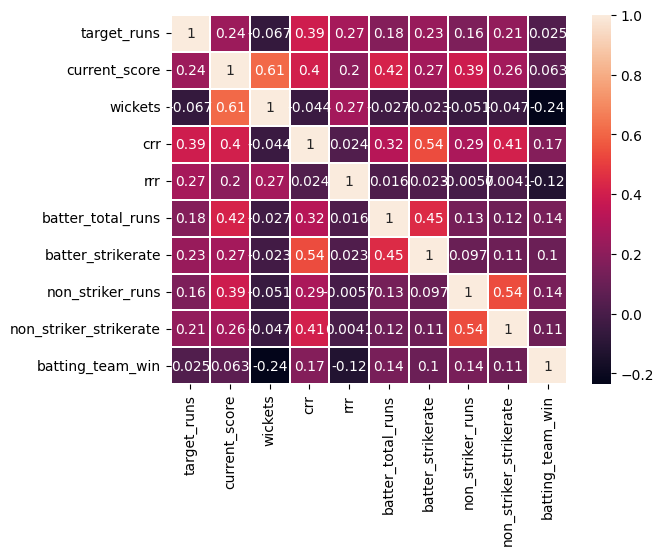

In [41]:
corr = df_final.corr(numeric_only=True)
sns.heatmap(corr,annot=True,linewidths=0.1)

In [42]:
df_final.keys()

Index(['city', 'match_type', 'target_runs', 'batting_team', 'bowling_team',
       'current_score', 'wickets', 'crr', 'rrr', 'batter_total_runs',
       'batter_strikerate', 'non_striker_runs', 'non_striker_strikerate',
       'batting_team_win'],
      dtype='object')

In [43]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250331 entries, 0 to 260610
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   city                    250331 non-null  object 
 1   match_type              250331 non-null  object 
 2   target_runs             250331 non-null  float64
 3   batting_team            250331 non-null  object 
 4   bowling_team            250331 non-null  object 
 5   current_score           250331 non-null  int64  
 6   wickets                 250331 non-null  int64  
 7   crr                     250331 non-null  float64
 8   rrr                     250331 non-null  float64
 9   batter_total_runs       250331 non-null  int64  
 10  batter_strikerate       250331 non-null  float64
 11  non_striker_runs        250331 non-null  int64  
 12  non_striker_strikerate  250331 non-null  float64
 13  batting_team_win        250331 non-null  int64  
dtypes: float64(5), int64(5), 

In [44]:
df_final = df_final.sample(frac=1, random_state=42).reset_index(drop=True)

<h1>Random Forest Classifier</h1>

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define features and target
X = df_final.drop("batting_team_win", axis=1)
y = df_final["batting_team_win"]

# Identify column types
categorical_cols = ["city", "match_type", "batting_team", "bowling_team"]
numerical_cols = ["target_runs", "current_score", "wickets", "crr", "rrr",
                  "batter_total_runs", "batter_strikerate",
                  "non_striker_runs", "non_striker_strikerate"]

# Preprocessor for numerical and categorical
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Final pipeline
pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=50,max_depth=25,random_state=42)
)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Evaluate
accuracy = pipeline.score(X_test, y_test)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9791


In [49]:
sample = pd.DataFrame([{
    'city': 'Mumbai',
    'match_type': 'League',
    'target_runs': 180,
    'batting_team': 'Mumbai Indians',
    'bowling_team': 'Chennai Super Kings',
    'current_score': 108,
    'wickets': 3,
    'crr': 9.0,
    'rrr': 9.0,
    'batter_total_runs': 50,
    'batter_strikerate': 200.0,
    'non_striker_runs': 15,
    'non_striker_strikerate': 150.0
}])

In [50]:
# Predict win probability
print(f"{sample['batting_team'][0]}: {pipeline.predict_proba(sample)[0][1]:.2%}")
print(f"{sample['bowling_team'][0]}: {pipeline.predict_proba(sample)[0][0]:.2%}")

Mumbai Indians: 56.87%
Chennai Super Kings: 43.13%


In [51]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[match['valid_ball']==1]
    match = match[(match['total_valid_balls'] % 6)==0]
    match = match[match['remaining_balls'] != 0]
    temp_df = match[['city','match_type','target_runs','batting_team','bowling_team','current_score','wickets','crr','rrr','batter_total_runs',
          'batter_strikerate','non_striker_runs','non_striker_strikerate','batting_team_win']].dropna()
    result = pipe.predict_proba(temp_df)
    match['lose'] = np.round(result.T[0]*100,1)
    match['win'] = np.round(result.T[1]*100,1)

    team1 = match[match['inning']==1]['batting_team'].unique()[0]
    team2 = match[match['inning']==1]['bowling_team'].unique()[0]
    
    team1_win = match[match['inning']==1]['win']
    match['team1_win'] = np.concatenate((team1_win,match[match['inning']==2]['lose']))
    team2_win = match[match['inning']==1]['lose']
    match['team2_win'] = np.concatenate((team2_win,match[match['inning']==2]['win']))
    
    match['end_of_over'] = range(1,match.shape[0]+1)
    
    target = match['target_runs'].values[0]
    match1 = match[match['inning']==1]
    
    runs = list(match[match['inning']==1]['remaining_runs'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    inning1_runs = np.array(runs)[:-1] - np.array(new_runs)

    runs = list(match[match['inning']==2]['remaining_runs'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    inning2_runs = np.array(runs)[:-1] - np.array(new_runs)
    np.concatenate((inning1_runs, inning2_runs))   
    match['runs_in_over'] = np.concatenate((inning1_runs, inning2_runs))
    
    wickets = list(match[match['inning']==1]['wickets'].values)
    new_wickets = wickets[:]
    wickets.insert(0,0)
    w = np.array(wickets)[:-1]
    nw = np.array(new_wickets)
    inning1_wickets = (nw - w)[0:temp_df.shape[0]]

    wickets = list(match[match['inning']==2]['wickets'].values)
    new_wickets = wickets[:]
    wickets.insert(0,0)
    w = np.array(wickets)[:-1]
    nw = np.array(new_wickets)
    inning2_wickets = (nw - w)[0:temp_df.shape[0]]
    match['wickets_in_over'] = np.concatenate((inning1_wickets, inning2_wickets))
    
    print("Target-",target)
    match = match[['end_of_over','runs_in_over','wickets_in_over','team1','team2','team1_win','team2_win']]

    return match,target,team1,team2

In [52]:
match_df,target,team1,team2 = match_progression(df_merge,1426300,pipeline)
match_df

Target- 188.0


,end_of_over,runs_in_over,wickets_in_over,team1,team2,team1_win,team2_win
258238,1,10.0,0,Royal Challengers Bengaluru,Delhi Capitals,68.8,31.2
258244,2,13.0,0,Royal Challengers Bengaluru,Delhi Capitals,55.4,44.6
258250,3,2.0,1,Royal Challengers Bengaluru,Delhi Capitals,57.4,42.6
258257,4,12.0,1,Royal Challengers Bengaluru,Delhi Capitals,58.5,41.5
258263,5,14.0,0,Royal Challengers Bengaluru,Delhi Capitals,74.5,25.5
258269,6,10.0,0,Royal Challengers Bengaluru,Delhi Capitals,78.6,21.4
258275,7,15.0,0,Royal Challengers Bengaluru,Delhi Capitals,85.9,14.1
258281,8,11.0,0,Royal Challengers Bengaluru,Delhi Capitals,87.1,12.9
258288,9,12.0,0,Royal Challengers Bengaluru,Delhi Capitals,90.3,9.7
258294,10,11.0,0,Royal Challengers Bengaluru,Delhi Capitals,92.3,7.7


In [53]:
team1 = ''.join([w[0].upper() for w in team1.split()])
team2 = ''.join([w[0].upper() for w in team2.split()])

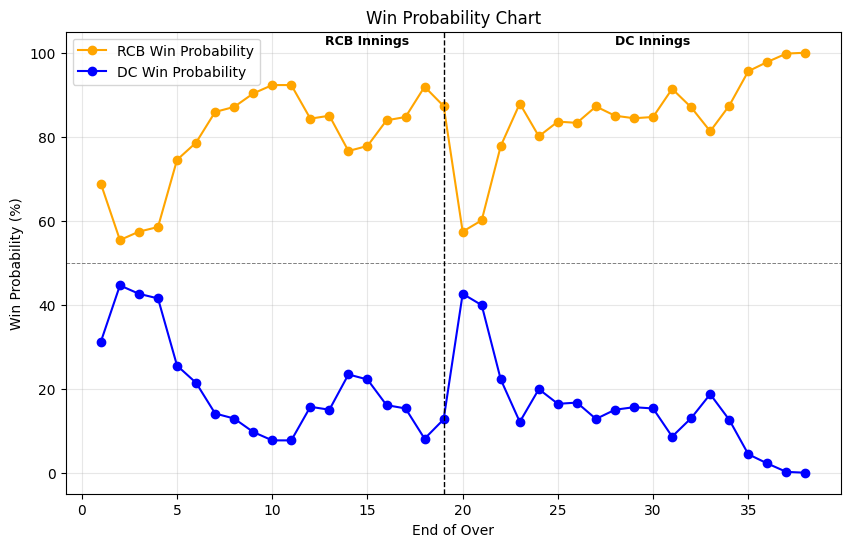

In [54]:
# Plot Win Probability line
plt.figure(figsize=(10,6))
plt.plot(match_df['end_of_over'], match_df['team1_win'], color='orange', marker='o', label=f'{team1} Win Probability')

# Team 2 win probability
plt.plot(match_df['end_of_over'], match_df['team2_win'], color='blue', marker='o', label=f'{team2} Win Probability')

# Add 50% line
plt.axhline(50, color='gray', linestyle='--', linewidth=0.7)

# Mark innings break
plt.axvline(19, color='black', linestyle='--', linewidth=1)
plt.text(15, 102, f"{team1} Innings", ha='center', fontsize=9, fontweight='bold')
plt.text(30, 102, f"{team2} Innings", ha='center', fontsize=9, fontweight='bold')

plt.xlabel("End of Over")
plt.ylabel("Win Probability (%)")
plt.title("Win Probability Chart")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [55]:
import pickle
pickle.dump(pipeline,open('pipe.pkl','wb'))